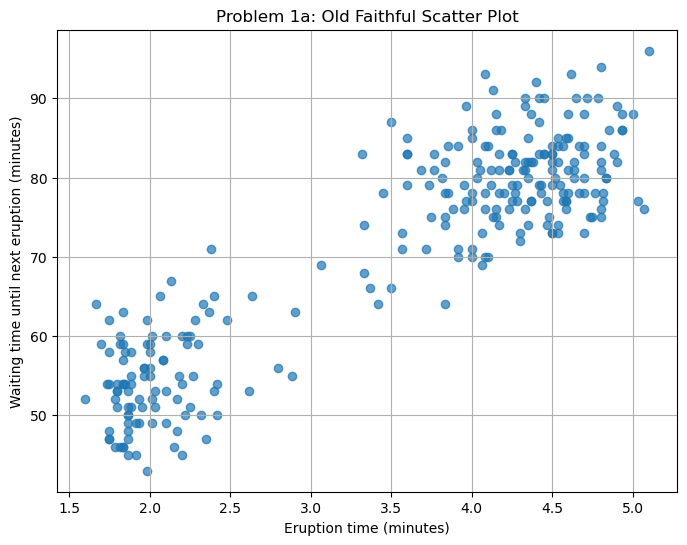

In [4]:
# Homework 3 – All Python Code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Old Faithful dataset
df = pd.read_csv(r"D:\Documents\Sem_3\IS733\HW3\faithful.csv")
X = df[['eruptions', 'waiting']].values

# -------------------------
# Problem 1
# -------------------------

# 1a. Scatter plot: eruption time vs waiting time
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time until next eruption (minutes)')
plt.title('Problem 1a: Old Faithful Scatter Plot')
plt.grid(True)
plt.show()



In [7]:
# -------------------------
# Problem 2
# -------------------------

def kmeans(X, k, max_iters=100, tol=1e-4, seed=42):
    """
    Implements k-means from scratch.
    Returns: centroids, labels, objective_values
    """
    rng = np.random.default_rng(seed)
    # Initialize centroids randomly
    centroids = X[rng.choice(len(X), size=k, replace=False)]
    objectives = []
    for i in range(max_iters):
        # Compute squared distances
        dists = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)**2
        labels = dists.argmin(axis=1)
        # Objective: sum of squared distances to assigned centroids
        obj = dists[np.arange(len(X)), labels].sum()
        objectives.append(obj)
        # Update centroids
        new_centroids = np.array([
            X[labels == j].mean(axis=0) if np.any(labels == j) else X[rng.choice(len(X))]
            for j in range(k)
        ])
        # Check convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            centroids = new_centroids
            break
        centroids = new_centroids
    return centroids, labels, objectives



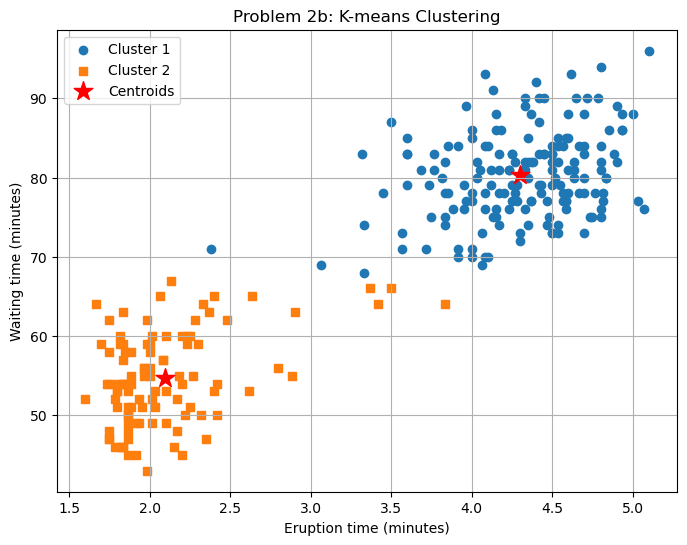

In [8]:
# Run k-means with K = 2
k = 2
centroids, labels, objectives = kmeans(X, k)

# 2b. Scatter plot of final clusters + centroids
plt.figure(figsize=(8, 6))
colors = ['C0', 'C1']
markers = ['o', 's']
for j in range(k):
    plt.scatter(
        X[labels == j, 0], X[labels == j, 1],
        color=colors[j], marker=markers[j],
        label=f'Cluster {j+1}'
    )
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    color='red', marker='*', s=200,
    label='Centroids'
)
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('Problem 2b: K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()



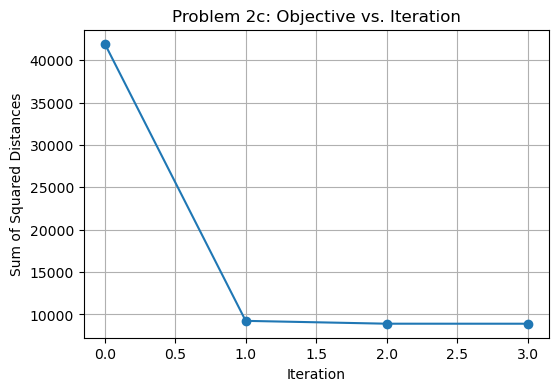

In [9]:
# 2c. Plot k-means objective vs. iterations
plt.figure(figsize=(6, 4))
plt.plot(objectives, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Sum of Squared Distances')
plt.title('Problem 2c: Objective vs. Iteration')
plt.grid(True)
plt.show()

